In [23]:
import numpy as np
import pandas as pd

data = pd.read_csv("automobile.csv",na_values='?')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rmp,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [24]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(data.shape[1], 
                                      data.shape[0],
                                      len(data.select_dtypes('O').columns),
                                      len(data.select_dtypes(['int64', 'float']).columns)))


No of columns: 26
No of rows: 205
No of categorical columns: 10
No of numerical columns: 16


In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


In [26]:
##data.isna().sum()
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [27]:
num_cols = data.select_dtypes(['int64', 'float']).columns
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [28]:
data.select_dtypes('O').columns
# Dropping rows with missing value rate higher than threshold
threshold = 0.03
data = data.loc[data.isnull().mean(axis=1) < threshold]
pd.DataFrame(data.isnull().sum(), columns=['Missing Values'])

,Missing Values
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [29]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [30]:
for col in num_cols:
    print(col,'-->',detect_outlier(data[col]))

symboling --> []
normalized-losses --> [10, 11, 104, 105, 106, 178, 179, 190]
wheel-base --> [70, 71, 73]
length --> [18]
width --> [6, 7, 8, 70, 71, 73, 74, 129]
height --> []
curb-weight --> []
engine-size --> [47, 48, 49, 71, 72, 73, 74]
bore --> []
stroke --> [29, 47, 48, 111, 113, 130, 131, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
compression-ratio --> [9, 29, 49, 66, 67, 68, 69, 70, 82, 83, 84, 90, 108, 110, 112, 114, 116, 117, 124, 158, 159, 174, 182, 184, 187, 192, 203]
horsepower --> [49, 105, 126, 127, 128, 129]
peak-rmp --> [165, 166]
city-mpg --> [18, 30]
highway-mpg --> [18, 30, 90]
price --> [15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128]


In [31]:
#Caping the outliers
# for col in num_cols:
#     indx = detect_outlier(data[col])
#     data[col].loc[indx] = data[col].median()

In [32]:
for col in num_cols:
    print(col,'-->',detect_outlier(data[col]))

symboling --> []
normalized-losses --> [10, 11, 104, 105, 106, 178, 179, 190]
wheel-base --> [70, 71, 73]
length --> [18]
width --> [6, 7, 8, 70, 71, 73, 74, 129]
height --> []
curb-weight --> []
engine-size --> [47, 48, 49, 71, 72, 73, 74]
bore --> []
stroke --> [29, 47, 48, 111, 113, 130, 131, 134, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
compression-ratio --> [9, 29, 49, 66, 67, 68, 69, 70, 82, 83, 84, 90, 108, 110, 112, 114, 116, 117, 124, 158, 159, 174, 182, 184, 187, 192, 203]
horsepower --> [49, 105, 126, 127, 128, 129]
peak-rmp --> [165, 166]
city-mpg --> [18, 30]
highway-mpg --> [18, 30, 90]
price --> [15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128]


In [33]:
#Droping the rows that contain outliers
for col in num_cols:
    indx = detect_outlier(data[col])
    data[col].loc[indx] = np.nan

data.dropna(inplace=True)

<Figure size 432x288 with 0 Axes>

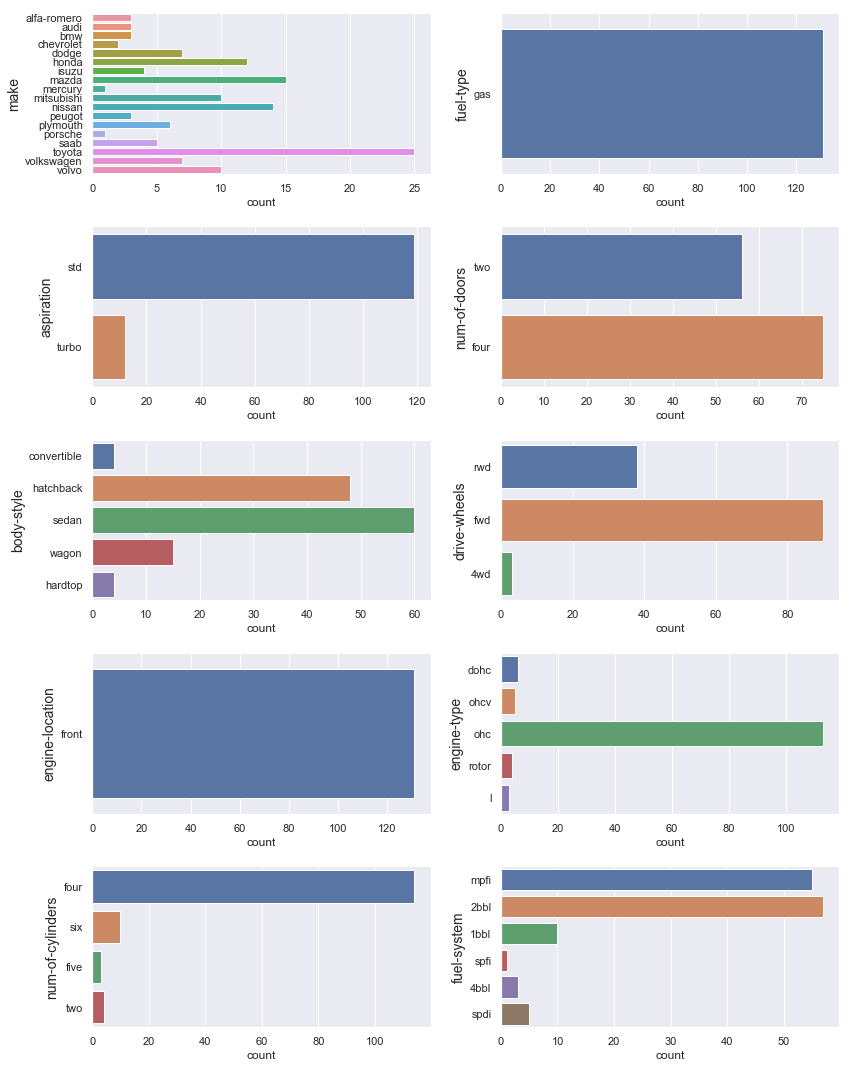

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import numpy as np
import warnings
warnings.filterwarnings('ignore')

cat_cols = data.select_dtypes('O').columns

def count_plot(data, features):
    i = 0
    plt.figure()
    col = 2
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(12,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        ax = sns.countplot(data=data,y=feature)
        ax.set_yticklabels(ax.get_yticklabels())
        plt.tight_layout()
        plt.ylabel(feature, fontsize=14)
    plt.show();
    
count_plot(data, cat_cols)

<Figure size 432x288 with 0 Axes>

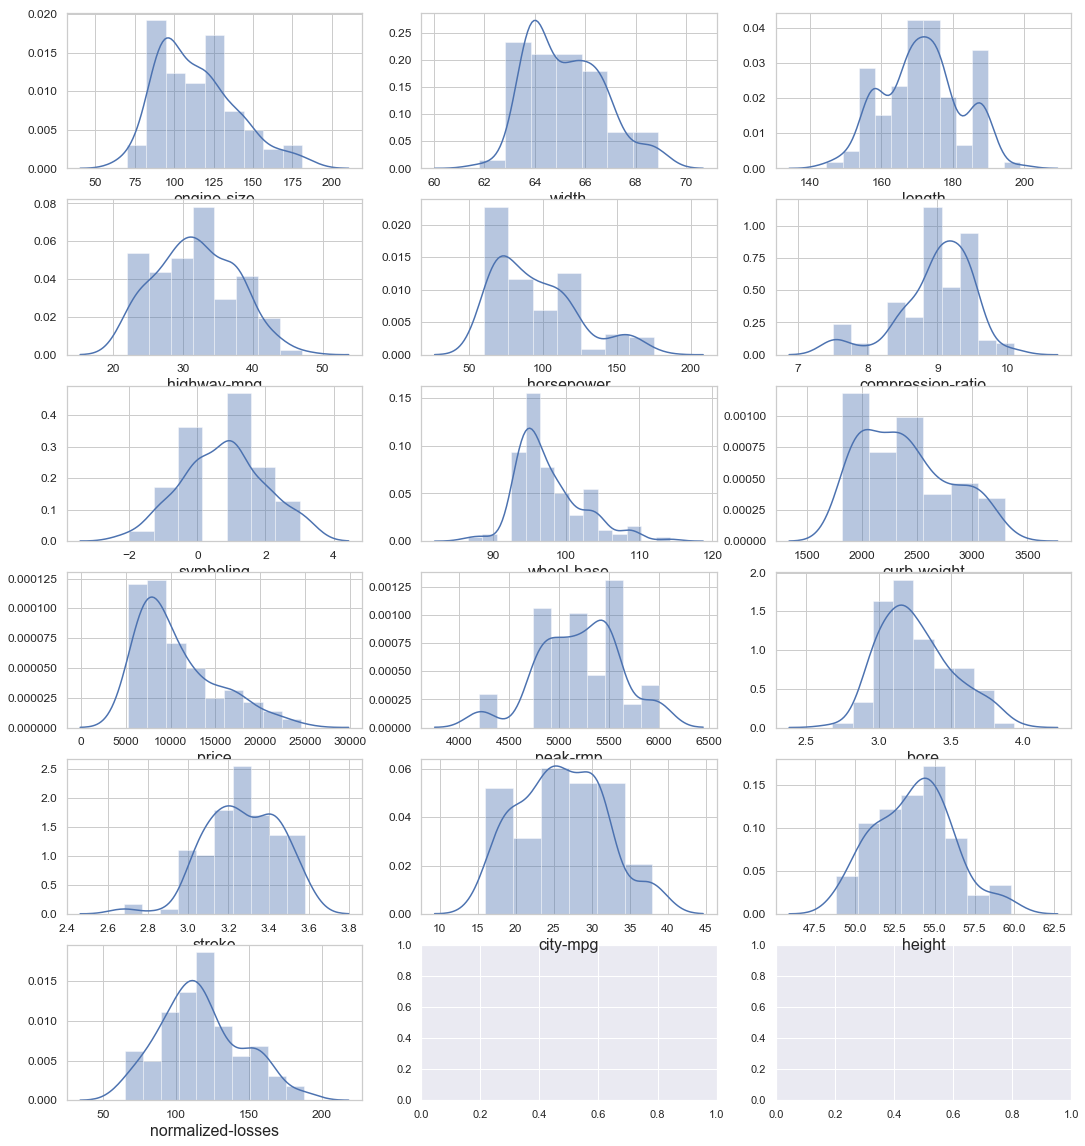

In [35]:

def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,20))
    sns.set_style("whitegrid")

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();

##plot_distribution(data, data.select_dtypes(['int64', 'float']).columns)
data.select_dtypes(['int64', 'float']).columns


plot_distribution(data, {'symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rmp', 'city-mpg',
       'highway-mpg', 'price'})

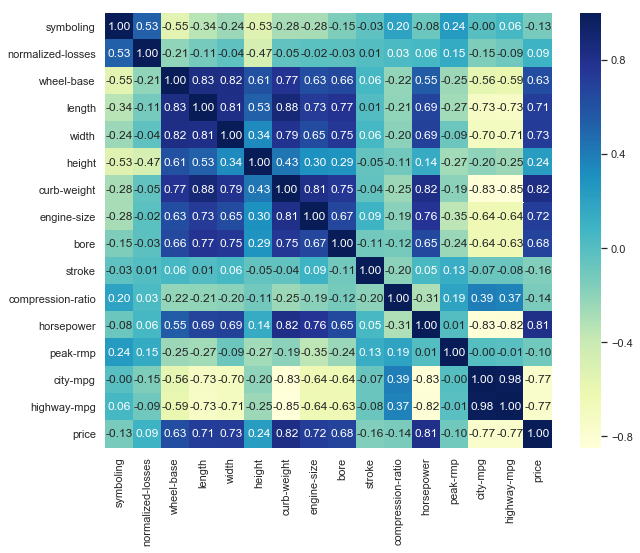

In [36]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".2f", cmap="YlGnBu");

In [37]:
X = data.loc[:, data.columns!='price']
y = data.loc[:, data.columns=='price']

In [38]:
# one hot encoding
x_cat_cols = X.select_dtypes('O').columns
X_encoded = pd.get_dummies(X, columns=x_cat_cols, prefix=x_cat_cols)

print("Now our dataset has {} columns.".format(X_encoded.shape[1]))
X_encoded

Now our dataset has 62 columns.


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,1,0,0,0,0,0,1,0,0
1,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,1,0,0,0,0,0,1,0,0
2,1.0,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,1,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,1,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,1,0,0,0,0,0,0,1,0,0
5,2.0,115.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,...,1,0,0,0,0,0,0,1,0,0
12,0.0,188.0,101.2,176.8,64.8,54.3,2710.0,164.0,3.31,3.19,...,0,0,1,0,0,0,0,1,0,0
13,0.0,188.0,101.2,176.8,64.8,54.3,2765.0,164.0,3.31,3.19,...,0,0,1,0,0,0,0,1,0,0
14,1.0,115.0,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,...,0,0,1,0,0,0,0,1,0,0
19,1.0,98.0,94.5,155.9,63.6,52.0,1874.0,90.0,3.03,3.11,...,0,1,0,0,0,1,0,0,0,0



# Normalize 

In [39]:
# Normalize Data
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(X_encoded.values)
X_standered = scaler.transform(X_encoded.values)
X_scaled = pd.DataFrame(X_standered, columns=X_encoded.columns)

In [40]:
# Now we have to make dataset for traing and validation.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1234)

print("""
X_train has {} data points.
y_train has {} data points.
X_test has {} data points.
y_test has {} data points.
""".format(X_train.shape[0], y_train.shape[0], X_test.shape[0], y_test.shape[0]))


X_train has 104 data points.
y_train has 104 data points.
X_test has 27 data points.
y_test has 27 data points.



## Step 4: Modeling

In [41]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 5: Validation

In [42]:
y_pred = lr_model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score

r2 = -r2_score(y_test, y_pred)

print("The R^2 score is {}".format(r2))

The R^2 score is -0.7304901684423954
